# Q2 Modeling

## Classification

### <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a>
<a href="https://casa-de-feel.tistory.com/10">Reference</a>

In [372]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [344]:
base_url = "./credit-card-fraud-detection"
card_df = pd.read_csv(os.path.join(base_url, "creditcard.csv"))
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [345]:
card_df.isna().sum()
# 결측치 없음

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [350]:
display(card_df["Class"].value_counts())

print(f'정상: {round(card_df["Class"].value_counts()[0] / len(card_df), 6)}%')
print(f'사기: {round(card_df["Class"].value_counts()[1] / len(card_df), 6)}%')
# 정상, 사기 데이터의 불균형 확인 가능

Class
0    284315
1       492
Name: count, dtype: int64

정상: 0.998273%
사기: 0.001727%


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

/var/folders/3v/_vbmz7l52xqds51kvwrk7k0h0000gn/T/ipykernel_22989/1428940734.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(card_df['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

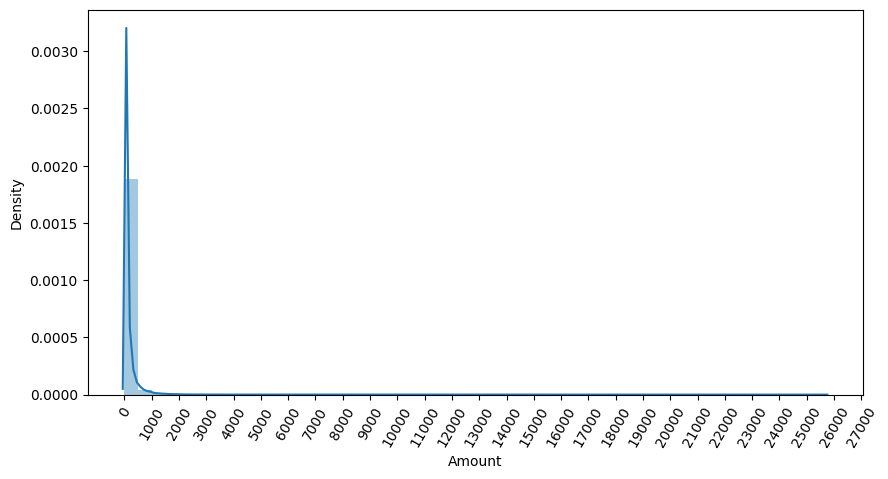

In [374]:
display(card_df["Amount"].describe())
#
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
# plt.xticks(range(0, 30000, 1000), rotation=60)
# sns.histplot(card_df["Amount"],
#              kde=True,
#              stat="density",
#              ax=ax)
# plt.show()

plt.figure(figsize=(10,5))
plt.xticks(range(0,30000,1000),rotation=60)
sns.distplot(card_df['Amount'])
# 카드 사용 금액이 1000달러 이하가 대부분

In [375]:
prev_card_df = card_df.copy()
print(prev_card_df.shape)

(284807, 31)


In [377]:
y_card_df = card_df["Class"].values
x_card_df = card_df.drop(["Class"], axis="columns").values
x_train, x_val, y_train, y_val = train_test_split(x_card_df, y_card_df,
                                                  stratify=)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

InvalidParameterError: The 'stratify' parameter of train_test_split must be an array-like or None. Got True instead.